# Patching

* With **patching**, you can change the behavior of a function call. 
* **Patching** is especially useful when the function calls an external system that is not under your control. 
* This is also useful when you want to simulate error conditions but you can’t actually cause those errors while under test.


# Two techniques for Patching

The mock library in Python gives you two ways of patching: 
* *patching a function’s return value*, and 
* *replacing a function with another function* (aka. **side effect**)

# Patching return values

* You can **patch a function's return value**.
* This is **useful for testing error handlers** because you can **pass back error condition codes** and see how your application behaves when it receives these return codes.
* This is also u**seful for controlling the data** that's returned from a function call.
* You can **pass back any data structure or object** that your program expects.
* By using the **`return_value` patch**, you can return anything that can be sent back as a return value from a function call.

# Patch example using return value

Let's see how to patch a function’s return value.

We’ll revisit the IMDB database example and see **how we can use the "`with`" expression to cause a variety of behaviors from the same call**.

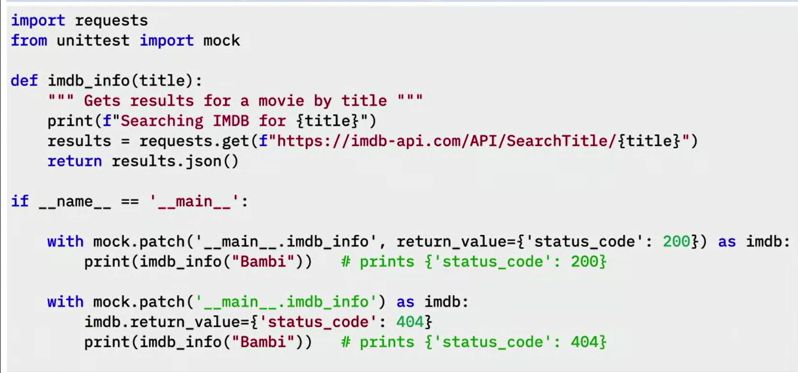

We want to create a function that calls the IMDB database and we name it "`imdb_info`".

We pass in the `title` of a movie as a parameter.

The first step in this function is to print a message that shows us the title we are searching for.

You'll see why we’re including this in a little bit.

Next, we call the IMBD API, telling it which movie title to look for.

Finally, we return the results as a **JavaScript Object Notation** otherwise known as **JSON**.

Now let's test **how this call to our new function handles error conditions**.

To do this, **we'll use a patch and two different return values**.

First, we use "`with`" and patch the function `imdb_info` to return a status code of `200`.
* `200` equates to `OK`, meaning the call was successful.
* When we run this test, the `imdb_info` function will never execute.
* Instead, a return value of `status_code` `200` will immediately be returned to the caller.

Next, we'll make the call to `imdb_info()` passing in **"Bambi"** as the `title`, and we print the return value.
* Sure enough, it returns a status code of `200`.
* What it does not return is the message that we printed as the first line of the `imdb_info` function.
* This proves to us that the function was never called.
* **By patching return value, we bypassed the function entirely**.

Next, we'll patch the call to `imdb_info()` again but this time we will use the `imdb` variable that we declared at the end of the "`with`" statement.
* This is just **an alternate way of patching**.
* We set the `imdb` variable to have a return value of "`status_code 404`". 
* A `404` means **"not found**". Perhaps your web browser returned this code to you once or twice before because it couldn't find a web page In this case it means that the movie could not be found.

Now when we make the call to our `imdb_info` function, passing in the `title` **"Bambi"**, we get back a status code of `404`.
* In order to cause this error condition in real life, you would need to pass in a title that really wasn't found.
* But with **patching**, we can prevent real existing information from being found to test for these error conditions.
* This example shows, **with patching we can take complete control over what a function returns to us**.
* In turn, we can **test for `good return codes` and `bad return codes` without calling the actual service** or trying to get it to return a bad return code.!


# Patch example variations

Let’s dig a bit deeper on patching.
* You can patch with precision.
* You’re not limited to patching some function that you wrote.
* You can actually patch a third-party library to return whatever you want.

Let's look at a small variation on the previous example.

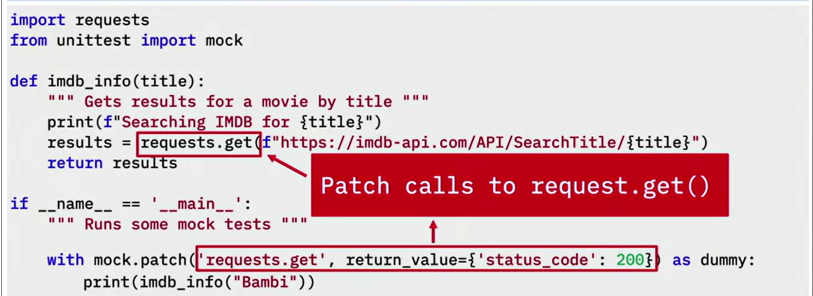

We start off with the same `imdb_info` function as before.
* This time we use `mock.patch` to patch the `get()` function in the "`requests`" package.
* We imported this Python library on the first line.
* Normally we would have no control over it.
* But with our patch, any time `requests.get()` is called, the function will return the value that we specify without ever being called.
* That means it won't actually call the IMDB database service while under test.
* Now the `imdb_info()` function runs as normal.
* All the lines will be executed.
* Just the remote call will be patched.

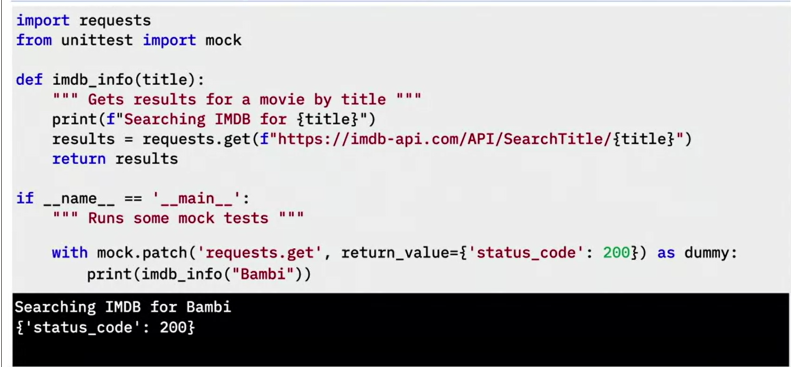

Finally, when we call the `imdb_info` function, it prints the message from the first line of the function.
* And then the function calls `requests.get()` but that call is never actually completed.
* Only the return value is passed back.
* The `imdb_info` function continues and returns the **status code** of `200` without every knowing that it never actually contacted the IMDB database.

This example shows that **you can be very precise with your patching**.

**We only patched a remote call within our function.**

If there was more code that checked return codes or processed the return values further, they would have been executed as well.



# Replacing a function

* Sometimes you need a patch to do more than just return a value.
* With **patching**, you can also replace a function with another function.
* This is known as a "**side effect**". 
* With the **"side effect"** technique, you can provide your own function to get called instead of the real function while under test.

Let's see how to use a side effect.


# Patch example using side effects

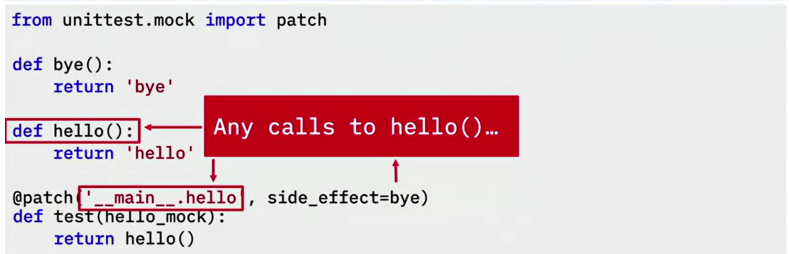

First we `import patch` from the `unittest.mock` library. This is another reason why I like unittest library; lots of helpful tools are built in.

After we `import patch`, I define two functions: 
    * one called `bye()` that returns a string **“bye”**
    * another called `hello()` that returns a string **“hello”**

Then we define a function called `test()`.

This function returns the results from a call to the `hello()` function that we just wrote.

Under normal conditions, we would expect the return value from this function to be the string "hello."

But these are not normal conditions.
* I decorate this test function with a **mock**, specifically a `mock.patch`.
* In Python, **decorators are a way of wrapping code around a function**.
* You can always identify a decorator because it starts with the "`@`" symbol signifying that this function is a decorator.
* With a **decorator**, whenever anyone calls the `test()` function, `patch()` is called first and then `patch()` calls the test function.
* Also notice that we're passing in some parameters to `patch()`.
    * The **first parameter** is a string that **represents the function** that we want to patch.
    * In this case we are patching the `hello` function from our `main` Python program.
    * The **second parameter** can be either a **side effect** or **return value**.
    * In this example we're using a **side effect**.

***A side effect takes an alternate path.***

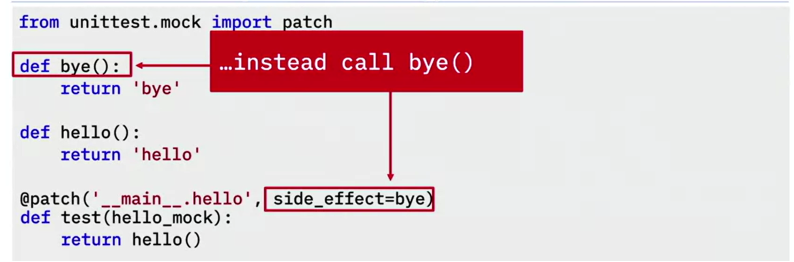

* Notice the value of the **side effect is a pointer to the bye function**.
* If you haven't guessed yet, when this patch is in effect, **any call to hello function will instead call the bye function**.
* Think about how powerful this is.
* We can write a function that does exactly what we want to do under test to create any condition that we need.
* That way, we can control exactly what comes back when the test runs.

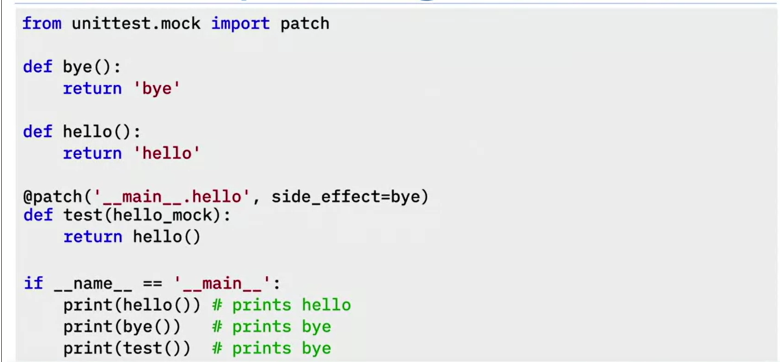

* Finally we write a main program, and when we run it, it calls the `hello()` function and prints **"hello"**. 
* It calls the `bye()` function and prints **"bye"**. 
* However, when it calls the `test()` function it prints **"bye"** because **we patched the hello function to call the bye function instead**.
